In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
ls

NNDL-HW1.pdf             linear-perceptron.ipynb  madaline.ipynb
adaline.ipynb            madaline.csv             perceptron.csv


In [19]:
df = pd.read_csv('madaline.csv', names=['x1', 'x2', 'y'], )

In [20]:
print(df.shape)
df.head(3)

(200, 3)


,x1,x2,y
0,0.459694,-0.470583,0.0
1,0.797385,-0.343030,0.0
2,0.235270,0.961296,0.0


In [82]:
def forward_pass_tanh(inputs, W):
    net = np.dot(inputs, W[:-1]) + W[-1]
    h = np.tanh(net*.0001)
    return net, h

In [83]:
def train_perceptron(X_train, y_train, max_epochs = 100):
    lamda = 0.0001
    W = np.zeros(X_train.shape[1] + 1)
    lr = .0001
    epochs = 0
    while True:
        errors = []
        epochs += 1
        for index in X_train.index:
            net, h = forward_pass(X_train.loc[index], W)
            error = .5*(y_train.loc[index] - np.tanh(lamda*net)) ** 2
            errors.append(error)
            print('error: {}'.format(error))
            print('X_train: {}'.format(X_train.loc[index]))
            print('W {}'.format(W))
            print('net: {}, h: {}'.format(net, h))
            W[:-1] += lr*(1 - h**2)*lamda*(y_train.loc[index] - h)*X_train.loc[index]
            W[-1] += lr*(1 - h**2)*lamda*(y_train.loc[index] - h)
            
        if not any(errors) or epochs > max_epochs:
            break
        if epochs % 10 == 0:
            print('epoch: {}'.format(epochs))
            print('sum of errors: {}'.format(sum(errors)))
    return W

In [84]:
def plot_dividing_lines(x, y, ax, points):
    sns.scatterplot(data=points, x='x1', y='x2', alpha=0.8, hue='y', palette='flare', ax=ax)
    sns.lineplot(x=x, y=y, color='black', ax=ax)

In [85]:
def find_dividing_line(X_train, y_train, df):
    W = train_perceptron(X_train, y_train)
    x1_min, x1_max = min(df['x1']), max(df['x1'])
    x = np.linspace(x1_min, x1_max, num=10000)
    y = (-W[0]*x - W[-1]) / W[1]
    return W, x, y

In [86]:
def find_misclassifieds(W, X_train, y_train):
    misclassified_indices = []
    for index in X_train.index:
        net, h = forward_pass(X_train.loc[index], W)
        if h != y_train.loc[index]:
            misclassified_indices.append(index)
    return misclassified_indices

In [87]:
X_train = df[['x1', 'x2']]
y_train = df['y']

In [88]:
and_df = pd.DataFrame({
    'x1': [1, 1, 0, 0], 
    'x2': [1, 0, 1, 0], 
    'y': [1, -1, -1, -1]
})

error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: in

Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
erro

error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
epoch: 80
sum of errors: 2.0
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1   

error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: in

Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
erro

error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    1
Name: 0, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    1
x2    0
Name: 1, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    1
Name: 2, dtype: int64
W [0. 0. 0.]
net: 0.0, h: 1
error: 0.5
X_train: x1    0
x2    0
Name: 3, dtype: in

<ipython-input-85-09c515f97bfb>:5: RuntimeWarning: invalid value encountered in true_divide
  y = (-W[0]*x - W[-1]) / W[1]


weights corresponded to a AND logic gate
[0. 0. 0.]


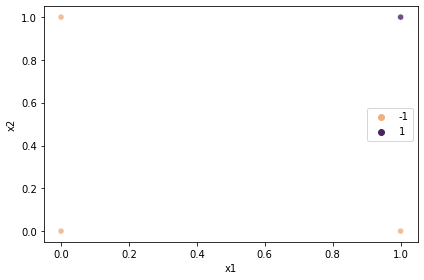

In [89]:
X_train = and_df[['x1', 'x2']]
y_train = and_df['y']
W, x, y = find_dividing_line(X_train, y_train, and_df)
ax = plt.subplot(111)
plot_dividing_lines(x, y, ax, and_df)
plt.tight_layout()
print('weights corresponded to a AND logic gate')
print(W)